# LPA

&emsp;&emsp;LPA算法全称Label ProPagation Algorithm,使用中使用多数投票方式进行标签传播的社区发现算法。核心思想就是各个节点根据与之相连的标签中大多数的标签类型来进行类别更新，最终的停止条件为设定指定的轮数或者更新一轮各个节点的Label都不再变化。

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# 使用NetworkX实现

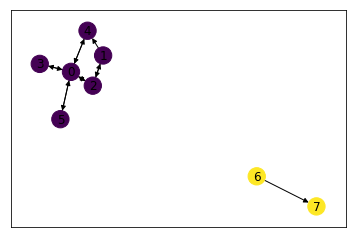

In [2]:
filePath = "label_data.txt"

def load_Data(filePath):
    
    f = open(filePath)
    G = nx.DiGraph()

    edge_weight_list = []
    for line in f.readlines():
        edge_weight = [int(i) for i in line.split("   ")]
        edge_weight_list.append(edge_weight)

    G.add_weighted_edges_from(edge_weight_list)
    
    # 给每个节点增加标签
    for node, data in list(G.nodes(data=True)):
        data['label'] = node
    
    return G

def lpa(graph):
    node_color = []
    cluster_result = nx.algorithms.community.asyn_lpa_communities(graph)
    return cluster_result
   
            
def plot_acrroding_lpa_cluster(lpa_cluster_result):
    node_color = []
    for i,data in enumerate(lpa_cluster_result):
        for node_number in data:
            node_color.append(i)
    
    nx.draw_networkx(G, node_color=node_color)
    plt.show()
    
    
G = load_Data(filePath)
lpa_cluster_result = lpa(G)
plot_acrroding_lpa_cluster(lpa_cluster_result)

# 自己构建从底层构建的LPA

In [3]:
def load_Data(filePath):
    
    f = open(filePath)
    G = nx.DiGraph()

    edge_weight_list = []
    for line in f.readlines():
        edge_weight = [int(i) for i in line.split("   ")]
        edge_weight_list.append(edge_weight)

    G.add_weighted_edges_from(edge_weight_list)
    
    # 给每个节点增加标签
    for node, data in list(G.nodes(data=True)):
        data['label'] = node
    
    return G

迭代次数 1
{4: [0, 1, 2, 3, 4, 5], 7: [6, 7]}
complete!


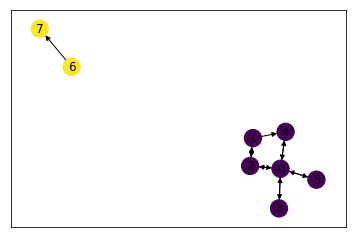

In [4]:
def lpa(graph):
    """
        Label Propagation Algorithm,这里的lpa目前为止只针对各个节点的权重均等的情况
        Parameters:
        ----------------------------
            graph: 有向图与无向图均可，但是图的各个节点上要有原始的label
        Return:
            graph: 使用LPA算法进行社区发现算法更新label后的graph
    """
    def estimate_stop_condition():
        """
        算法终止条件：所有节点的标签与大部分邻居节点标签相同或者迭代次数超过指定值则停止
        :return:
        """
        for node in graph.nodes():
            count = {}
            for neighbor in graph.neighbors(node):
                neighbor_label = graph._node[neighbor]['label']
                count[neighbor_label] = count.setdefault(
                    neighbor_label, 0) + 1

            # 找到计数值最大的label
            count_items = count.items()
            count_items.sort(key=lambda x: x[1], reverse=True)
            labels = [k for k, v in count_items if v == count_items[0][1]]
            # 当节点标签与大部分邻居节点标签相同时则达到停止条件
            if graph.node[node]['label'] not in labels:
                return False

        return True
    
    
    
    loop_count = 0

    # 迭代标签传播过程
    while True:
        loop_count += 1
        print('迭代次数', loop_count)

        for node in graph.nodes():
            count = {}
            
            # 获取各个邻居节点的标签
            for neighbor in graph.neighbors(node):        
                neighbor_label = graph._node[neighbor]['label']
                count[neighbor_label] = count.get(neighbor_label,0)+1
    
            # 判断当前节点是否存在邻居节点，存在邻居节点找到邻居节点中计数最大的标签
            if count!={}:
                count_items = list(count.items())
                count_items.sort(key=lambda x: x[1], reverse=True)
                labels = [(k, v) for k, v in count_items if v == count_items[0][1]]

                # 当多个标签最大计数值相同时随机选取一个标签
                label = random.sample(labels, 1)[0][0]
                graph._node[node]['label'] = label
        
        print(get_cluster_result(G))
            
        if loop_count >= 10 or estimate_stop_condition:
            print('complete!')
            return graph
        
def plot_graph(graph):
    """
        使用带label的图进行聚类可视化
    """
    
    node_color = []
    for node,data in graph.nodes().items():
        node_color.append(data['label'])
    
    nx.draw_networkx(graph,node_color=node_color)
    plt.show()
    
    
def get_cluster_result(graph):
    """
        输出各个类中的节点情况
    """
    cluster_reuslt = {}
    for node,data in graph.nodes().items():
        label = data['label']
        if cluster_reuslt.get(label,[])==[]:
            cluster_reuslt[label] = []
        cluster_reuslt[label].append(node)
    
    return cluster_reuslt
    
        
        
G = load_Data(filePath)      
G= lpa(G)
plot_graph(G)                             